In [1]:
from netCDF4 import Dataset
import glob,sys
from matplotlib import patheffects
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import xarray as xr
from wrf import (getvar, to_np, vertcross, smooth2d, CoordPair, GeoBounds,
                 get_cartopy, latlon_coords, cartopy_xlim, cartopy_ylim,interpline)


In [26]:
from os.path import expanduser
home = expanduser("~")

In [28]:
files = glob.glob(f"{home}/WRF/WRF/run/wrfout_d01_*")

In [29]:
files

['/Users/chowdahead/WRF/WRF/run/wrfout_d01_2020-05-31_00:00:00',
 '/Users/chowdahead/WRF/WRF/run/wrfout_d01_2020-08-10_00:00:00',
 '/Users/chowdahead/WRF/WRF/run/wrfout_d01_2020-08-09_12:00:00',
 '/Users/chowdahead/WRF/WRF/run/wrfout_d01_2020-06-06_12:00:00',
 '/Users/chowdahead/WRF/WRF/run/wrfout_d01_2020-06-18_00:00:00',
 '/Users/chowdahead/WRF/WRF/run/wrfout_d01_2020-06-11_00:00:00']

In [12]:
ncfile = Dataset(files[0])
list(ncfile.variables)

['Times',
 'XLAT',
 'XLONG',
 'LU_INDEX',
 'ZNU',
 'ZNW',
 'ZS',
 'DZS',
 'VAR_SSO',
 'U',
 'V',
 'W',
 'PH',
 'PHB',
 'T',
 'THM',
 'HFX_FORCE',
 'LH_FORCE',
 'TSK_FORCE',
 'HFX_FORCE_TEND',
 'LH_FORCE_TEND',
 'TSK_FORCE_TEND',
 'MU',
 'MUB',
 'NEST_POS',
 'P',
 'PB',
 'FNM',
 'FNP',
 'RDNW',
 'RDN',
 'DNW',
 'DN',
 'CFN',
 'CFN1',
 'THIS_IS_AN_IDEAL_RUN',
 'P_HYD',
 'Q2',
 'T2',
 'TH2',
 'PSFC',
 'U10',
 'V10',
 'RDX',
 'RDY',
 'AREA2D',
 'DX2D',
 'RESM',
 'ZETATOP',
 'CF1',
 'CF2',
 'CF3',
 'ITIMESTEP',
 'XTIME',
 'QVAPOR',
 'QCLOUD',
 'QRAIN',
 'QICE',
 'QSNOW',
 'QGRAUP',
 'QNICE',
 'QNRAIN',
 'SHDMAX',
 'SHDMIN',
 'SNOALB',
 'TSLB',
 'SMOIS',
 'SH2O',
 'SMCREL',
 'SEAICE',
 'XICEM',
 'SFROFF',
 'UDROFF',
 'IVGTYP',
 'ISLTYP',
 'VEGFRA',
 'GRDFLX',
 'ACGRDFLX',
 'ACSNOM',
 'SNOW',
 'SNOWH',
 'CANWAT',
 'SSTSK',
 'COSZEN',
 'LAI',
 'U10E',
 'V10E',
 'DTAUX3D',
 'DTAUY3D',
 'DUSFCG',
 'DVSFCG',
 'VAR',
 'CON',
 'OA1',
 'OA2',
 'OA3',
 'OA4',
 'OL1',
 'OL2',
 'OL3',
 'OL4',
 'TKE_PBL

In [15]:
var = getvar(ncfile, "QRAIN",timeidx=1)
#rdn = getvar(ncfile,varname="RDN",timeidx=0)

In [16]:
var.units

'kg kg-1'

In [17]:
ncfile.START_DATE

'2020-05-31_00:00:00'

In [30]:
def get_files():
    files = glob.glob(f"{home}/WRF/WRF/run/wrfout_d01_*")
    return files

In [31]:
def get_data(files,index):
    """
    index: file index number in filenames list 
    *
    """
    ncfile = Dataset(files[index])
    print("\nLons:\n------------------------------------")
    print(getvar(ncfile, "XLONG").min(),getvar(ncfile, "XLONG").max())
    print("\nLats:\n------------------------------------")
    print(getvar(ncfile, "XLAT").min(),getvar(ncfile, "XLAT").max())
    return ncfile

In [32]:
def set_variable(ncfile,var_name,time_index):
    """
    var_name: name of variable, ie 'slp'
    time_index: forecasst time index
    """
    
    var = getvar(ncfile,var_name,timeidx=time_index)
    if var_name == "slp":
        var = smooth2d(var, 3)
    lats, lons = latlon_coords(var)
    return lats,lons,var

In [33]:
def get_wrf_times(time_string):
    """
    time_strings: var.TIME
    """
    date_time_obj = var.Time.dt.strftime("%Y-%m-%d %H:%M")
    print(date_time_obj)
    cut_time = str(date_time_obj.Time)[36:55]
    print(cut_time)
    timez = ((cut_time).replace('T',' ')).replace('Z','')
    print(timez)
    
    title_time = datetime.strptime(timez, '%Y-%m-%d %H:%M:%S')
    title_time ="{0:%d-%b-%Y %H%MZ}".format(title_time)
    print(title_time)
    
    file_time = datetime.strptime(timez, '%Y-%m-%d %H:%M:%S')
    file_time = "{0:%Y_%m_%d_%H%MZ}".format(file_time)
    print(file_time)
    
    return title_time,file_time

In [34]:
files = get_files()
ncfile = get_data(files,1) 
var_short_name = "EMISS"
lats,lons,var = set_variable(ncfile,var_short_name,2)

vals = var.values


Lons:
------------------------------------
<xarray.DataArray 'XLONG' ()>
array(-134.1409, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2020-08-10 <xarray.DataArray 'XLONG' ()>
array(-66.75574, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2020-08-10

Lats:
------------------------------------
<xarray.DataArray 'XLAT' ()>
array(12.991066, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2020-08-10 <xarray.DataArray 'XLAT' ()>
array(55.417797, dtype=float32)
Coordinates:
    Time     datetime64[ns] 2020-08-10


In [35]:
vals = var.values

In [36]:
var.description

'SURFACE EMISSIVITY'

In [37]:
var

<xarray.DataArray 'EMISS' (south_north: 149, west_east: 149)>
array([[0.98      , 0.98      , 0.98      , ..., 0.98      , 0.98      ,
        0.98      ],
       [0.98      , 0.98      , 0.98      , ..., 0.98      , 0.98      ,
        0.98      ],
       [0.98      , 0.98      , 0.98      , ..., 0.98      , 0.98      ,
        0.98      ],
       ...,
       [0.98      , 0.98      , 0.98      , ..., 0.95      , 0.95      ,
        0.95      ],
       [0.98      , 0.98      , 0.98      , ..., 0.95      , 0.95      ,
        0.95      ],
       [0.98      , 0.98      , 0.98      , ..., 0.95      , 0.95000005,
        0.95      ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -118.0414 -117.80124 ... -66.75574
    XLAT     (south_north, west_east) float32 12.991066 13.050507 ... 51.704277
    XTIME    float32 360.0
    Time     datetime64[ns] 2020-08-10T06:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    Memo

<xarray.DataArray 'strftime' ()>
array('2020-08-10 06:00', dtype=object)
Coordinates:
    XTIME    float32 360.0
    Time     datetime64[ns] 2020-08-10T06:00:00
2020-08-10T06:00:00
2020-08-10 06:00:00
10-Aug-2020 0600Z
2020_08_10_0600Z
2020_08_10_0600Z_wrf_EMISS


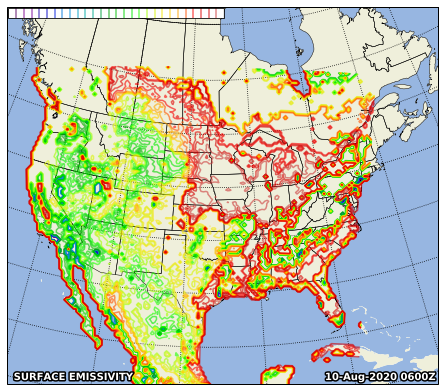

In [40]:
# Get the cartopy projection object
cart_proj = get_cartopy(var)

# Create a figure that will have 3 subplots
fig = plt.figure(figsize=(17,11))
ax = fig.add_subplot(1,2,1,projection=crs.LambertConformal())

# Download and create the states, land, and oceans using cartopy features
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m',
                                      facecolor='none',
                                      name='admin_1_states_provinces_shp')
land = cfeature.NaturalEarthFeature(category='physical', name='land',
                                    scale='50m',
                                    facecolor=cfeature.COLORS['land'])
ocean = cfeature.NaturalEarthFeature(category='physical', name='ocean',
                                     scale='50m',
                                     facecolor=cfeature.COLORS['water'])

ax.set_extent([-120,-70,20,60],crs.PlateCarree())

# Make the pressure contours
contour_levels = [960, 965, 970, 975, 980, 990]
#cs = ax.contour(lons, lats, to_np(slp).astype(int),np.arange(1000,1030,2),
#                    colors="r", transform=crs.PlateCarree(), zorder=30,
#                    linewidths=1.0)
#plt.clabel(cs,np.arange(1000,1030,2),inline=1, fmt='%d', fontsize=10,inline_spacing=-8,
#          colors="k")

cs = ax.contour(lons, lats, var,30,cmap="nipy_spectral",
                     transform=crs.PlateCarree(), zorder=30,alpha=0.6) #vmin=998,vmax=1028
#vals = np.ma.masked_where(vals <0.1, vals)
#cs = ax.contourf(lons, lats, vals,cmap="nipy_spectral",
#                     transform=crs.PlateCarree(), zorder=300,alpha=0.6)

#plt.colorbar(cs)
# Draw the oceans, land, and states
ax.add_feature(ocean)
ax.add_feature(land)
ax.add_feature(states, linewidth=.5, edgecolor="black")

# Crop the domain to the region around the hurricane
#hur_bounds = GeoBounds(CoordPair(lat=20, lon=-120.0),
#                       CoordPair(lat=60, lon=-70.0))
#ax.set_xlim(cartopy_xlim(var, geobounds=hur_bounds))
#ax.set_ylim(cartopy_ylim(var, geobounds=hur_bounds))
ax.gridlines(color="k", linestyle="dotted")

outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]

cbar = plt.colorbar(cs,orientation="horizontal",ticks=range(998,1030,8)) #,ticks=ticks
#cbar = plt.colorbar(cs,orientation="horizontal") #,ticks=ticks
posn = ax.get_position()
cbar.ax.set_position([posn.x0+0.001, posn.y0-0.001,
                            (posn.x1-posn.x0)/2, posn.height])

title_time,file_time = get_wrf_times(var)

text_time = ax.text(.995, 0.01, 
            title_time,
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=10, weight='bold',zorder=100)
text_descr = ax.text(.015, 0.01,
            var.description,
            horizontalalignment='left', transform=ax.transAxes,
            color='white', fontsize=10, weight='bold',zorder=100)


text_time.set_path_effects(outline_effect)
text_descr.set_path_effects(outline_effect)
print(f"{file_time}_wrf_{var_short_name}")
plt.savefig(f"{home}/Desktop/{file_time}_wrf_{var_short_name}.png",bbox_inches="tight",dpi=200)
plt.show()


In [41]:
File = files[1]

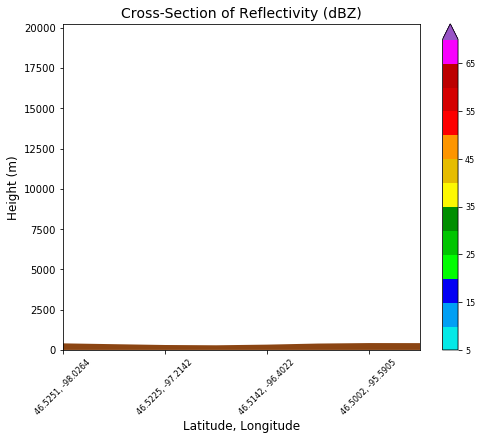

In [43]:


wrf_file = Dataset(File)

# Define the cross section start and end points
cross_start = CoordPair(lat=46.5, lon=-98)
cross_end = CoordPair(lat=46.5, lon=-95)

# Get the WRF variables
ht = getvar(wrf_file, "z", timeidx=0)
ter = getvar(wrf_file, "ter", timeidx=0)
dbz = getvar(wrf_file, "dbz", timeidx=0)
max_dbz = getvar(wrf_file, "mdbz", timeidx=0)
Z = 10**(dbz/10.) # Use linear Z for interpolation

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section in the metadata by setting latlon
# to True.
z_cross = vertcross(Z, ht, wrfin=wrf_file,
                    start_point=cross_start,
                    end_point=cross_end,
                    latlon=True, meta=True)

# Convert back to dBz after interpolation
dbz_cross = 10.0 * np.log10(z_cross)

# Add back the attributes that xarray dropped from the operations above
dbz_cross.attrs.update(z_cross.attrs)
dbz_cross.attrs["description"] = "radar reflectivity cross section"
dbz_cross.attrs["units"] = "dBZ"

# To remove the slight gap between the dbz contours and terrain due to the
# contouring of gridded data, a new vertical grid spacing, and model grid
# staggering, fill in the lower grid cells with the first non-missing value
# for each column.

# Make a copy of the z cross data. Let's use regular numpy arrays for this.
dbz_cross_filled = np.ma.copy(to_np(dbz_cross))

# For each cross section column, find the first index with non-missing
# values and copy these to the missing elements below.
for i in range(dbz_cross_filled.shape[-1]):
    column_vals = dbz_cross_filled[:,i]
    # Let's find the lowest index that isn't filled. The nonzero function
    # finds all unmasked values greater than 0. Since 0 is a valid value
    # for dBZ, let's change that threshold to be -200 dBZ instead.
    first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
    dbz_cross_filled[0:first_idx, i] = dbz_cross_filled[first_idx, i]

# Get the terrain heights along the cross section line
ter_line = interpline(ter, wrfin=wrf_file, start_point=cross_start,
                      end_point=cross_end)

# Get the lat/lon points
lats, lons = latlon_coords(dbz)

# Get the cartopy projection object
cart_proj = get_cartopy(dbz)

# Create the figure
fig = pyplot.figure(figsize=(8,6))
ax_cross = pyplot.axes()

dbz_levels = np.arange(5., 75., 5.)

# Create the color table found on NWS pages.
dbz_rgb = np.array([[4,233,231],
                    [1,159,244], [3,0,244],
                    [2,253,2], [1,197,1],
                    [0,142,0], [253,248,2],
                    [229,188,0], [253,149,0],
                    [253,0,0], [212,0,0],
                    [188,0,0],[248,0,253],
                    [152,84,198]], np.float32) / 255.0

dbz_map, dbz_norm = from_levels_and_colors(dbz_levels, dbz_rgb,
                                           extend="max")

# Make the cross section plot for dbz
dbz_levels = np.arange(5.,75.,5.)
xs = np.arange(0, dbz_cross.shape[-1], 1)
ys = to_np(dbz_cross.coords["vertical"])
dbz_contours = ax_cross.contourf(xs,
                                 ys,
                                 to_np(dbz_cross_filled),
                                 levels=dbz_levels,
                                 cmap=dbz_map,
                                 norm=dbz_norm,
                                 extend="max")
# Add the color bar
cb_dbz = fig.colorbar(dbz_contours, ax=ax_cross)
cb_dbz.ax.tick_params(labelsize=8)

# Fill in the mountain area
ht_fill = ax_cross.fill_between(xs, 0, to_np(ter_line),
                                facecolor="saddlebrown")

# Set the x-ticks to use latitude and longitude labels
coord_pairs = to_np(dbz_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]

# Set the desired number of x ticks below
num_ticks = 5
thin = int((len(x_ticks) / num_ticks) + .5)
ax_cross.set_xticks(x_ticks[::thin])
ax_cross.set_xticklabels(x_labels[::thin], rotation=45, fontsize=8)

# Set the x-axis and  y-axis labels
ax_cross.set_xlabel("Latitude, Longitude", fontsize=12)
ax_cross.set_ylabel("Height (m)", fontsize=12)

# Add a title
ax_cross.set_title("Cross-Section of Reflectivity (dBZ)", {"fontsize" : 14})

pyplot.show()

## Explore the simulated radar reflectivity

* Currently the values are displaying fill values...

In [ ]:
# Get the cartopy projection object
cart_proj = get_cartopy(var)

# Create a figure that will have 3 subplots
fig = plt.figure(figsize=(17,11))
ax = fig.add_subplot(1,2,1,projection=crs.LambertConformal())

# Download and create the states, land, and oceans using cartopy features
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m',
                                      facecolor='none',
                                      name='admin_1_states_provinces_shp')
land = cfeature.NaturalEarthFeature(category='physical', name='land',
                                    scale='50m',
                                    facecolor=cfeature.COLORS['land'])
ocean = cfeature.NaturalEarthFeature(category='physical', name='ocean',
                                     scale='50m',
                                     facecolor=cfeature.COLORS['water'])

ax.set_extent([-120,-70,20,60],crs.PlateCarree())

# Make the pressure contours
contour_levels = [960, 965, 970, 975, 980, 990]
#cs = ax.contour(lons, lats, to_np(slp).astype(int),np.arange(1000,1030,2),
#                    colors="r", transform=crs.PlateCarree(), zorder=30,
#                    linewidths=1.0)
#plt.clabel(cs,np.arange(1000,1030,2),inline=1, fmt='%d', fontsize=10,inline_spacing=-8,
#          colors="k")
dbz = getvar(wrf_file, "dbz", timeidx=-1)
max_dbz = getvar(wrf_file, "mdbz", timeidx=-1)
Z = 10**(dbz/10.) # Use linear Z for interpolation
dbz_levels = np.arange(5.,75.,5.)

cs = ax.contourf(lons, lats, dbz[0,:,:],cmap=ref_cmap,
                     transform=crs.PlateCarree(), zorder=30)

#cs = plt.pcolormesh(lons, lats, dbz[0,:,:],8,cmap="nipy_spectral",vmin=998,vmax=1028,
#                     transform=crs.PlateCarree(), zorder=30,alpha=0.6)
#plt.colorbar(cs)
# Draw the oceans, land, and states
ax.add_feature(ocean)
ax.add_feature(land)
ax.add_feature(states, linewidth=.5, edgecolor="black")

# Crop the domain to the region around the hurricane
#hur_bounds = GeoBounds(CoordPair(lat=20, lon=-120.0),
#                       CoordPair(lat=60, lon=-70.0))
#ax.set_xlim(cartopy_xlim(var, geobounds=hur_bounds))
#ax.set_ylim(cartopy_ylim(var, geobounds=hur_bounds))
ax.gridlines(color="k", linestyle="dotted")

outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]

cbar = plt.colorbar(cs,orientation="horizontal") #,ticks=ticks ticks=range(998,1030,8)
posn = ax.get_position()
cbar.ax.set_position([posn.x0+0.001, posn.y0-0.001,
                            (posn.x1-posn.x0)/2, posn.height])

title_time,file_time = get_wrf_times(var)

text_time = ax.text(.995, 0.01, 
            title_time,
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=10, weight='bold',zorder=100)
text_descr = ax.text(.015, 0.01,
            var.description,
            horizontalalignment='left', transform=ax.transAxes,
            color='white', fontsize=10, weight='bold',zorder=100)


text_time.set_path_effects(outline_effect)
text_descr.set_path_effects(outline_effect)

plt.savefig(f"{home}/Desktop/{file_time}_wrf_radar.png",bbox_inches="tight",dpi=200)
plt.show()
